# Bernstein-Vazirani Algorithm ([link](https://youtu.be/sqJIpHYl7oo))

In [55]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [56]:
secretnum = '101001'

In [57]:
circuit = QuantumCircuit(len(secretnum) + 1, len(secretnum))
circuit.h(range(len(secretnum)))
circuit.x(len(secretnum))
circuit.h(len(secretnum))

circuit.barrier()

for i, bit in enumerate(reversed(secretnum)):
  if bit == '1':
    circuit.cx(i, len(secretnum))

# circuit.cx(5, 6)
# circuit.cx(3, 6)
# circuit.cx(0, 6)

circuit.barrier()

circuit.h(range(len(secretnum)))

circuit.barrier()
circuit.measure(range(len(secretnum)), range(len(secretnum)))

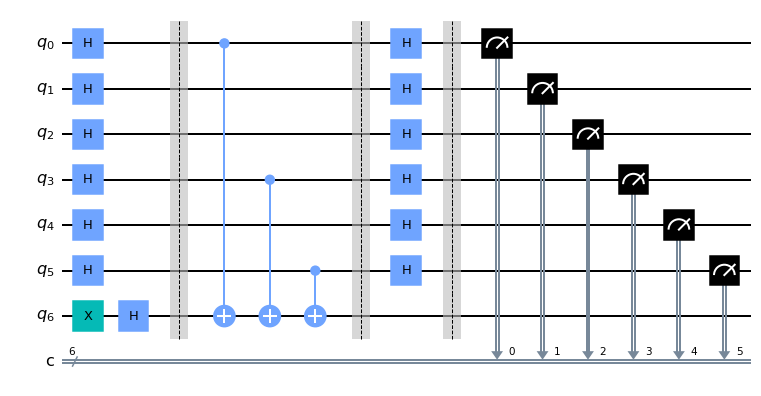

In [58]:
circuit.draw(output='mpl')

In [59]:
from qiskit.providers.aer import AerSimulator
simulator = AerSimulator(provider='qasm')
result = execute(circuit, simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}


A classical computer would require n guesses (where n is the nubmer of bits in `secretnum`) to mask the bits and find the secret number.